<a href="https://colab.research.google.com/github/Anshul20052000/Projects/blob/main/Dog_vs_Cat_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 209MB/s]
100% 1.06G/1.06G [00:06<00:00, 168MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout # to prevent Overfitting

In [5]:
# Generators => Divide your whole Data into Batches if you have limited RAM so that you can even create a very large ML Model

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int', 
    batch_size=32, 
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int', 
    batch_size=32, 
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization()) # To prevent Overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization()) # To prevent Overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization()) # To prevent Overfitting
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1)) # To prevent Overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1)) # To prevent Overfitting
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.1959 - accuracy: 0.6061 - val_loss: 0.5888 - val_accuracy: 0.6790
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5637 - accuracy: 0.7125 - val_loss: 0.4909 - val_accuracy: 0.7666
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4629 - accuracy: 0.7817 - val_loss: 0.5378 - val_accuracy: 0.7334
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4080 - accuracy: 0.8155 - val_loss: 1.1480 - val_accuracy: 0.5834
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3431 - accuracy: 0.8524 - val_loss: 0.4434 - val_accuracy: 0.8034
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2859 - accuracy: 0.8812 - val_loss: 0.5995 - val_accuracy: 0.7626
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2062 - accuracy: 0.9153 - val_loss: 0.5529 - val_ac

In [12]:
history.history

{'loss': [0.6059819459915161,
  0.46996548771858215,
  0.3647613525390625,
  0.23592182993888855,
  0.1358654499053955,
  0.07491017132997513,
  0.04828951880335808,
  0.04050244390964508,
  0.03524504229426384,
  0.028936509042978287],
 'accuracy': [0.6595500111579895,
  0.774150013923645,
  0.836899995803833,
  0.9003499746322632,
  0.9464499950408936,
  0.9728000164031982,
  0.9826499819755554,
  0.9860000014305115,
  0.9881500005722046,
  0.9915500283241272],
 'val_loss': [0.5116564631462097,
  0.4370664954185486,
  0.44520464539527893,
  0.5352348685264587,
  0.7686893343925476,
  0.8696460723876953,
  1.0035046339035034,
  1.026550054550171,
  1.2071729898452759,
  1.1817548274993896],
 'val_accuracy': [0.746999979019165,
  0.8050000071525574,
  0.7975999712944031,
  0.8105999827384949,
  0.8011999726295471,
  0.8015999794006348,
  0.8027999997138977,
  0.7929999828338623,
  0.7928000092506409,
  0.7940000295639038]}

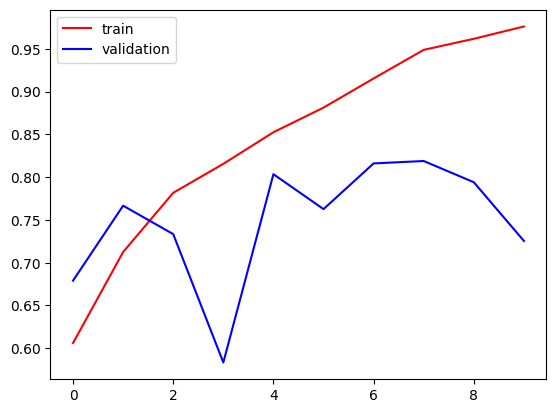

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

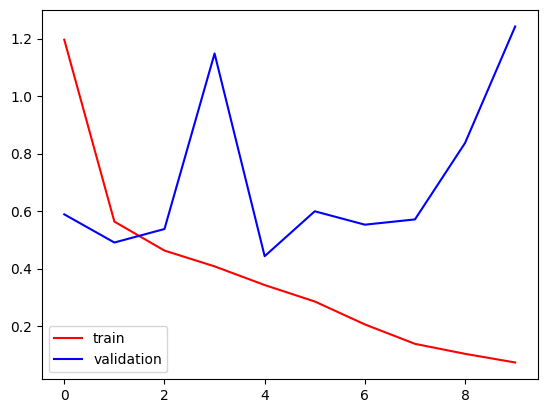

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [25]:
# Ways to reduce Overfitting

# 1. Add more Data
# 2. Data Augumentation
# 3. L1/L2 Regularizer
# 4. Dropout
# 5. Batch Normalization
# 6. Reduce Complexity

In [26]:
import cv2

In [27]:
test_img = cv2.imread('/content/cat.jpg')

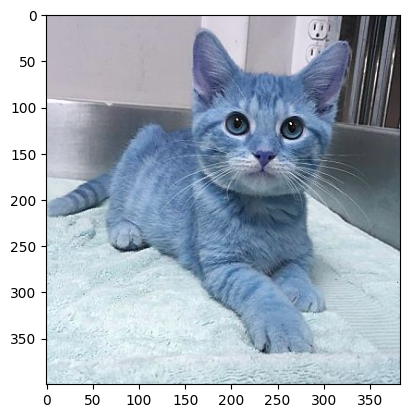

In [28]:
plt.imshow(test_img)

In [30]:
test_img.shape

(400, 383, 3)

In [31]:
test_img = cv2.resize(test_img, (256, 256))

In [34]:
test_input = test_img.reshape((1, 256, 256, 3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 260ms/step


array([[0.]], dtype=float32)

In [42]:
test_img = cv2.imread('/content/dog.jpg')

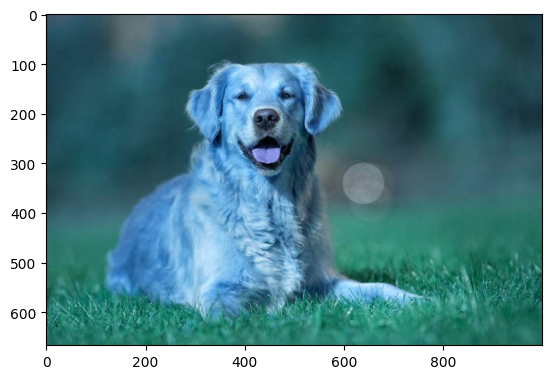

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(667, 1000, 3)

In [45]:
test_img = cv2.resize(test_img, (256, 256))

In [46]:
test_input = test_img.reshape((1, 256, 256, 3))

In [47]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)